# K-Means Clustering

## Importing the libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [35]:
df = pd.read_csv('Mall_Customers.csv')

x = df.iloc[:, [3, 4]].values # NOTE! in an unsupervised problem, such as "Clustering", we do NOT have a pre-defined "y". Therefore we do NOT seperate the last clomun by ":-1". Also, in order to "visualise_2D" the data at the end, we have to choose ONLY 2 features of the "df". Thus, we choose "Annual Income(k$)" and "Spebding Score(1-100)".

# Hence, bc we do NOT HAVE "y" in "Clustering" problems, we do NOT efine a "y" in here. As a result, we do NOT do "train-test-split". And again as a result, we do NOT do the "Feature Scaling"

In [36]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Using the elbow method to find the optimal number of clusters

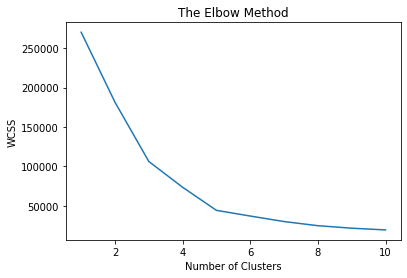

In [37]:
# What we use here is a "for loop" and the "WCSS" metric (by "KMeans.inertia_")!

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11): # check for 10 haalat
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [38]:
# As we see above, the optimal number of clusters is "5".

## Training the K-Means model on the dataset

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(x) #or: kmeans.fit(x) and then kmeans.predict(x)

In [40]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## Visualising the clusters

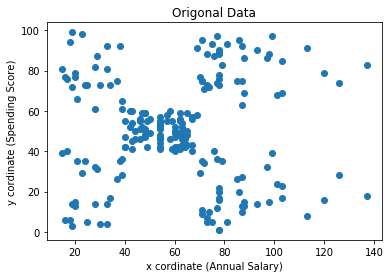

In [41]:
plt.scatter(x[:, 0], x[:, 1])
plt.title("Origonal Data")
plt.xlabel("x cordinate (Annual Salary)")
plt.ylabel("y cordinate (Spending Score)")
plt.show()

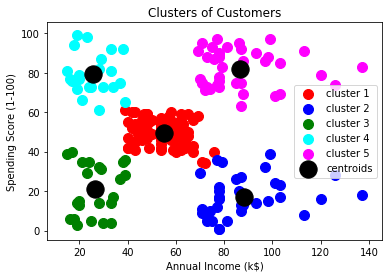

In [42]:
#plotting the clusters:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'red', label = "cluster 1")
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = "cluster 2")
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = "cluster 3")
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = "cluster 4")
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = "cluster 5")

#plotting the centroids:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = "centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [43]:
# Cluster green = low income + low spending = no strategy! = neither protect nor hit with new and irresistable offers
# Cluster blue = high income + low spending = should send them better (improve) advertising to attract them more 
# Cluster cyan = low income + high spending = should be protected! = should not be hit with new and irresistable offers
# Cluster magenta = high income + high spending = graet! = should be hit with new and irresistable offers
# Cluster red = medium income + medium spending = shouldn't do too much here